In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.333151,0.817612,1.053157e-06,0.464083,0.795866,0.003577,0.536615,0.725376,0.021615,0.583785,...,0.298020,0.441401,0.106351,0.295892,0.383372,0.108970,0.300419,0.322889,0.110478,hola
1,0.329372,0.813988,1.088528e-06,0.463937,0.790899,-0.011287,0.538200,0.718516,0.000853,0.586788,...,0.298784,0.443172,0.082076,0.296522,0.386052,0.074619,0.299447,0.326183,0.066980,hola
2,0.334836,0.819911,1.079038e-06,0.469407,0.796867,-0.006507,0.540850,0.725792,0.006209,0.586905,...,0.302980,0.442591,0.075773,0.300824,0.387381,0.071187,0.303389,0.328905,0.066303,hola
3,0.342404,0.819447,1.094999e-06,0.474587,0.798059,-0.011470,0.547300,0.726538,-0.001331,0.593290,...,0.307678,0.447482,0.068371,0.305691,0.390814,0.061781,0.308738,0.331134,0.055515,hola
4,0.380724,0.825505,9.480158e-07,0.505562,0.804970,-0.014795,0.582247,0.726374,-0.006124,0.629772,...,0.337966,0.443938,0.065173,0.334757,0.387985,0.061621,0.335270,0.331447,0.059010,hola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
387,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
388,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
389,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu


In [11]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.333151,0.817612,1.053157e-06,0.464083,0.795866,0.003577,0.536615,0.725376,0.021615,0.583785,...,0.298020,0.441401,0.106351,0.295892,0.383372,0.108970,0.300419,0.322889,0.110478,hola
1,0.329372,0.813988,1.088528e-06,0.463937,0.790899,-0.011287,0.538200,0.718516,0.000853,0.586788,...,0.298784,0.443172,0.082076,0.296522,0.386052,0.074619,0.299447,0.326183,0.066980,hola
2,0.334836,0.819911,1.079038e-06,0.469407,0.796867,-0.006507,0.540850,0.725792,0.006209,0.586905,...,0.302980,0.442591,0.075773,0.300824,0.387381,0.071187,0.303389,0.328905,0.066303,hola
3,0.342404,0.819447,1.094999e-06,0.474587,0.798059,-0.011470,0.547300,0.726538,-0.001331,0.593290,...,0.307678,0.447482,0.068371,0.305691,0.390814,0.061781,0.308738,0.331134,0.055515,hola
4,0.380724,0.825505,9.480158e-07,0.505562,0.804970,-0.014795,0.582247,0.726374,-0.006124,0.629772,...,0.337966,0.443938,0.065173,0.334757,0.387985,0.061621,0.335270,0.331447,0.059010,hola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
387,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
388,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
389,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu


In [12]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (391, 63)
Labels shape = (391,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [14]:
y_pred = svm.predict(x_test)
y_pred

array(['hola', 'iloveu', 'iloveu', 'iloveu', 'hola', 'iloveu', 'iloveu',
       'hola', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu',
       'iloveu', 'hola', 'iloveu', 'iloveu', 'hola', 'hola', 'iloveu',
       'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu',
       'iloveu', 'iloveu', 'iloveu', 'hola', 'iloveu', 'iloveu', 'iloveu',
       'hola', 'hola', 'iloveu', 'iloveu', 'hola', 'iloveu', 'iloveu',
       'iloveu', 'hola', 'iloveu', 'hola', 'iloveu', 'iloveu', 'iloveu',
       'hola', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'hola',
       'iloveu', 'iloveu', 'hola', 'hola', 'iloveu', 'iloveu', 'iloveu',
       'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu',
       'iloveu', 'iloveu', 'iloveu', 'iloveu', 'hola', 'iloveu', 'iloveu',
       'iloveu', 'iloveu', 'iloveu', 'hola'], dtype=object)

In [15]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.6835443037974683, 0.6835443037974683, 0.6835443037974683)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

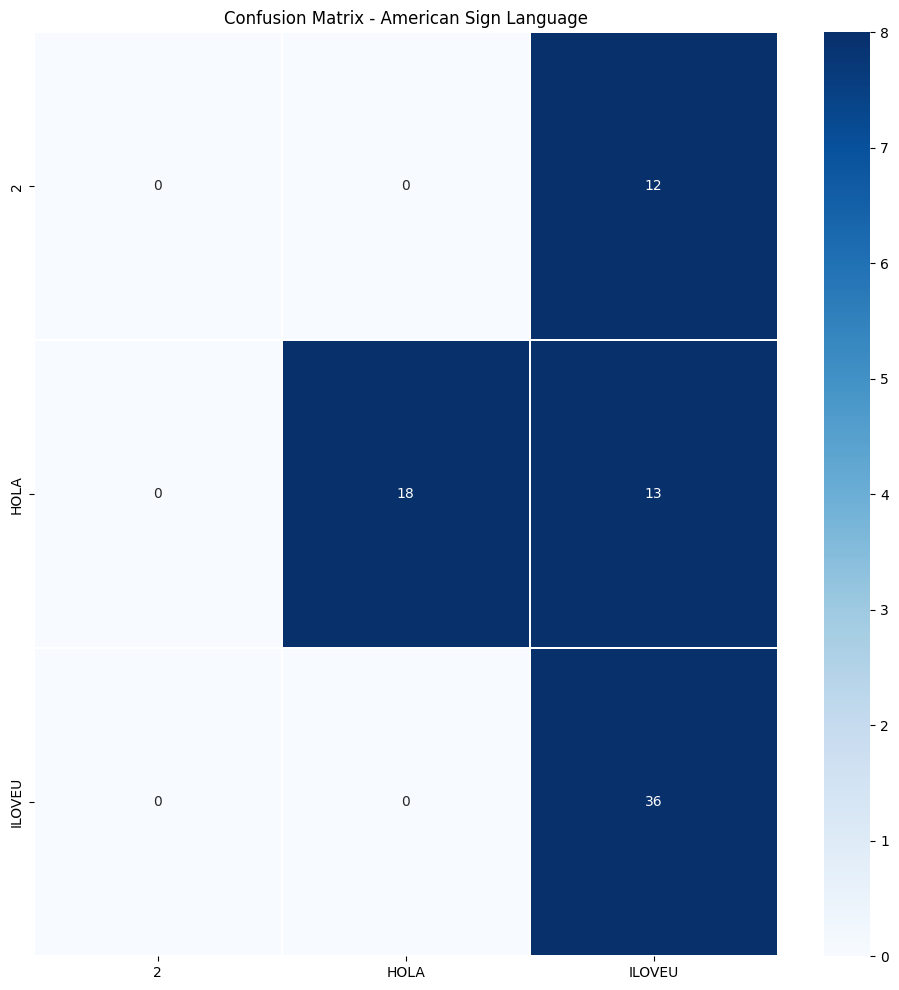

In [16]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [17]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)